In [ ]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt

print(tf.keras.__version__)

2.12.0


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

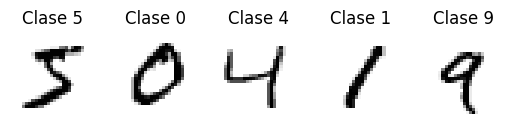

In [ ]:
# Enseñamos muestras de nuestro dataset de entrenamiento
'''
for i in range(5):
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.title('Class {}'.format(y_train[i]))
  plt.show()
'''
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(x_train[i], cmap=plt.cm.binary)
    axs[i].axis('off')
    axs[i].set_title('Clase {}'.format(y_train[i]))
plt.show()

In [ ]:
print(x_train.ndim)
print(x_train.shape)

3
(60000, 28, 28)


In [ ]:
# Ejemplo, queremos manipular las imagenes de x_train desde 0 hasta la 100
ejemplo = x_train[1:100]
print(ejemplo.shape)

(99, 28, 28)


In [ ]:
#Para que quede más claro podemos hacer
ejemplo = x_train[1:100, 0:28, 0:28]
print(ejemplo.shape)

(99, 28, 28)


(99, 28, 28)


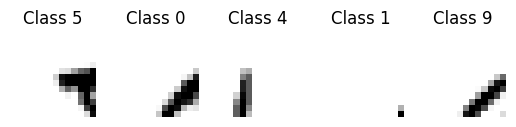

In [ ]:
# Si solo queremos seleccionar 14 pixeles de la parte inferior de la derecha
ejempolo = x_train[:, 0:14, 0:14]
print(ejemplo.shape)
fig, axs = plt.subplots(1, 5)
for i in range(5):
  axs[i].imshow(ejempolo[i], cmap=plt.cm.binary)
  axs[i].axis('off')
  axs[i].set_title('Class {}'.format(y_train[i]))
plt.show()

# **PREPROCESADO DE DATOS**

In [ ]:
print(x_train.dtype) # Tipo de unidad que tenemos actualmente

uint8


In [ ]:
# Lo normal, es que x_train y x_test sea del tipo 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train.ndim

3

Otra transformación necesaria es cambiar la forma de los tensores **sin cambiar los datos**.

Esto significa que tenemos que cambiar la dimension de nuestra imagen. Ahora la tenemos en 28*28 pixeles (2D). Lo ideal seria cambiarla a una dimensión de 24 * 24=784 pixeles. Como vemos no se pierde la infomación, sino que simplemente se reestructuran los datos

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Ahora convertimos los y_train y y_test a variables categoricas
from tensorflow.keras.utils import to_categorical

print("***** ANTES *****")
print("y_train[0] = ",y_train[0])
print("y_test[0] = ",y_test[0])

print("\n***** DESPUES *****")
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("y_train[0] = ",y_train[0])
print("y_test[0] = ",y_test[0])

***** ANTES *****
y_train[0] =  5
y_test[0] =  7

***** DESPUES *****
y_train[0] =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_test[0] =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Definicion del modelo

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784 ,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



Para entender los parametros, son los pesos de las neuronas. Son los que la red tiene que aprender para predecir bien. 


*   Primera Capa: Como entrada tenemos 784 píxeles que se conectan a las 10 neuronas que tenemos, tendremos unos pesos de (784 * 10). Ahora falta sumerle 10 pesos más que concretamente es el BIAS. Este es útil para mejorar el aprendizaje. Finalmente (784 * 10) + 10 = 7850 parametros.

*   Segunda Capa: Como entrada tendremos 10 neuronas (Las de la capa 1). Por defeecto, keras ya coge estas entradas y no hace falta definir ningún 'input_shape'. Entonces tendremos (10 * 10) parametros ya que vames de una capa que tiene 10 neuronas a otra que también tiene 10 neuronas. Finalmente, falta sumar los pesos del bias que concretamente son 10. (10 * 10) + 10 = 110 parametros



In [ ]:
from keras.optimizers.optimizer_v1 import Optimizer
model.compile(loss = "categorical_crossentropy",
              optimizer = "sgd",
              metrics = ['accuracy'])
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9524 - accuracy: 0.4657
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3651 - accuracy: 0.6732
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0358 - accuracy: 0.7494
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8510 - accuracy: 0.7949
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7296 - accuracy: 0.8253


# Evaluacion del modelo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("test_loss", test_loss)
print("test_acc", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.8455
test_loss 0.6704899668693542
test_acc 0.8454999923706055
